#                             Car Prices Linear Regression Assignment                                 
                                                                                                Dev: Sudhasrinivas Pallam

# Problem Statement

Geely Auto want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

    1. Which variables are significant in predicting the price of a car
    2. How well those variables describe the price of a car


# Business Goal

We are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market. 

# Steps

1. Reading, understanding and visualising the data
2. Preparing the data for modelling ( train-test split, rescaling etc)
3. Training the model
4. Residual analysis
5. Predications and evalution on the test set

# Step 1: Reading, understanding and visualising data 

In [1]:
#supress warning
import warnings
warnings.filterwarnings('ignore')

#import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#import Scikit
import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import statsmodels.api as sm 

#importing RFE and Linear Regression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor



In [2]:
#Load file from the path 
path = "CarPrice_Assignment.csv";

In [3]:
#read the csv file  
car_price_df = pd.read_csv(path)

In [4]:
car_price_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
car_price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [6]:
car_price_df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [7]:
car_price_df.shape

(205, 26)

In [8]:
car_price_df.isnull().sum(axis=0).sort_values(ascending=False)

price               0
highwaympg          0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
car_ID              0
dtype: int64

######  No null values in the data received 

### Data Cleaning and clensing 

As per the data CarName independent variable is combiantion of Company Name and Car Model Name.

We need to clean the data and make a derived variabe Company Name for further process

In [9]:
car_price_df['companyname'] = ((car_price_df['CarName'].str.upper()).str.split(expand=True))[0]
car_price_df.companyname.value_counts()

TOYOTA         31
NISSAN         18
MAZDA          15
HONDA          13
MITSUBISHI     13
SUBARU         12
PEUGEOT        11
VOLVO          11
DODGE           9
VOLKSWAGEN      9
BMW             8
BUICK           8
AUDI            7
PLYMOUTH        7
SAAB            6
ISUZU           4
PORSCHE         4
JAGUAR          3
ALFA-ROMERO     3
CHEVROLET       3
RENAULT         2
VW              2
MAXDA           2
MERCURY         1
TOYOUTA         1
VOKSWAGEN       1
PORCSHCE        1
Name: companyname, dtype: int64

In [10]:
#Data seems to be duplicated and mispelled, need to correct data 
car_price_df.companyname = car_price_df.companyname.replace(['PORCSHCE','TOYOUTA','VOKSWAGEN','MAXDA','VW'],['PORSCHE','TOYOTA','VOLKSWAGEN','MAZDA','VOLKSWAGEN'])
car_price_df.companyname.value_counts()

TOYOTA         32
NISSAN         18
MAZDA          17
HONDA          13
MITSUBISHI     13
VOLKSWAGEN     12
SUBARU         12
PEUGEOT        11
VOLVO          11
DODGE           9
BMW             8
BUICK           8
AUDI            7
PLYMOUTH        7
SAAB            6
PORSCHE         5
ISUZU           4
JAGUAR          3
CHEVROLET       3
ALFA-ROMERO     3
RENAULT         2
MERCURY         1
Name: companyname, dtype: int64

In [11]:
#Drop CarName field as we will be using derived field for future analysis
car_price_df.drop(['CarName'], axis=1)

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,companyname
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,ALFA-ROMERO
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,ALFA-ROMERO
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,ALFA-ROMERO
3,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,AUDI
4,5,2,gas,std,four,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,AUDI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,gas,std,four,sedan,rwd,front,109.1,188.8,...,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0,VOLVO
201,202,-1,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0,VOLVO
202,203,-1,gas,std,four,sedan,rwd,front,109.1,188.8,...,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0,VOLVO
203,204,-1,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,idi,3.01,3.40,23.0,106,4800,26,27,22470.0,VOLVO


# Exploratory Data Analysis


# Univarient Analysis

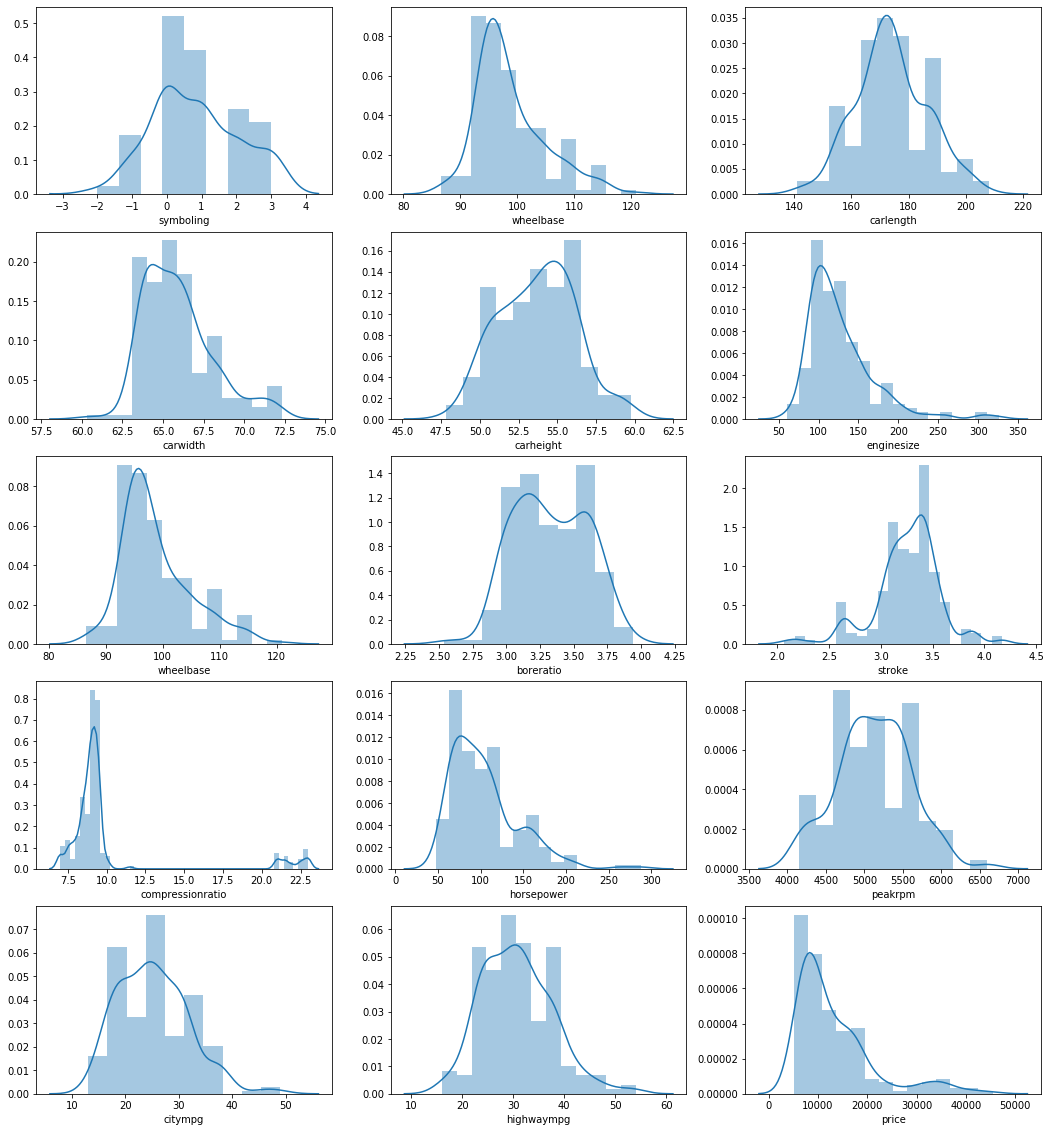

In [12]:
# Plotting distribution for numerical variables for better understaing of data 

plt.figure(figsize=(18,20))
plt.subplot(5,3,1)
sns.distplot(car_price_df['symboling'])

plt.subplot(5,3,2)
sns.distplot(car_price_df['wheelbase'])

plt.subplot(5,3,3)
sns.distplot(car_price_df['carlength'])

plt.subplot(5,3,4)
sns.distplot(car_price_df['carwidth'])

plt.subplot(5,3,5)
sns.distplot(car_price_df['carheight'])

plt.subplot(5,3,6)
sns.distplot(car_price_df['enginesize'])

plt.subplot(5,3,7)
sns.distplot(car_price_df['wheelbase'])

plt.subplot(5,3,8)
sns.distplot(car_price_df['boreratio'])

plt.subplot(5,3,9)
sns.distplot(car_price_df['stroke'])

plt.subplot(5,3,10)
sns.distplot(car_price_df['compressionratio'])

plt.subplot(5,3,11)
sns.distplot(car_price_df['horsepower'])

plt.subplot(5,3,12)
sns.distplot(car_price_df['peakrpm'])

plt.subplot(5,3,13)
sns.distplot(car_price_df['citympg'])

plt.subplot(5,3,14)
sns.distplot(car_price_df['highwaympg'])

plt.subplot(5,3,15)
sns.distplot(car_price_df['price'])


plt.show()

### Distribution plot Inferences

1) For the independent variables symboling, carwidth, carheight, boreratio, peakrpm, citympg, highwaympg, stroke data was nomarlly distributed 

2) For Independent variables  horsepower, compressioratio, enginesize, wheelbase, data seems to be right skewed

3) For dependent variable price data seems to be right skewed. 
   Most of the data was plotted >20000

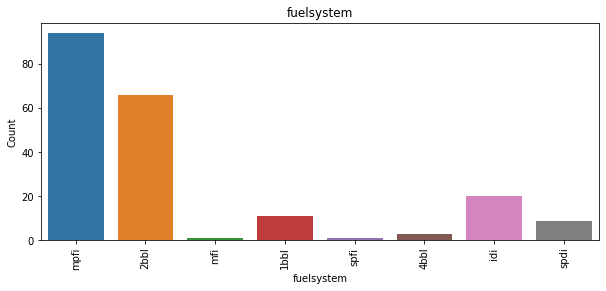

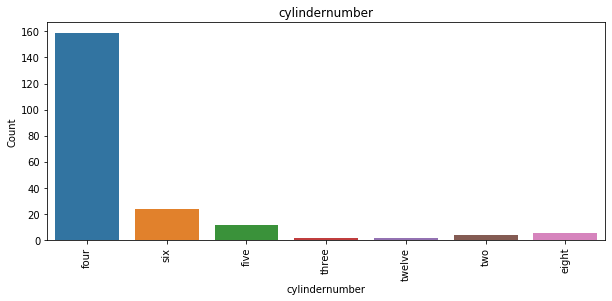

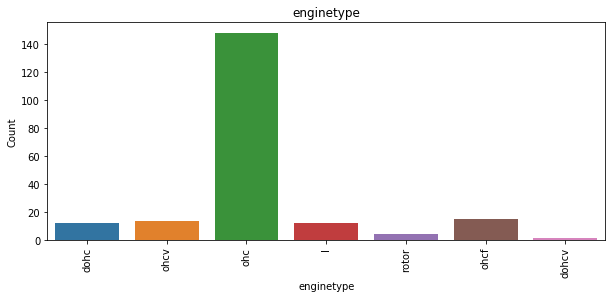

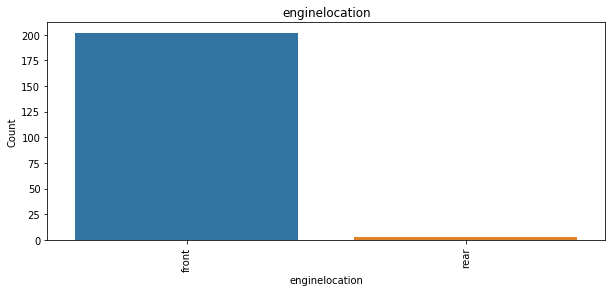

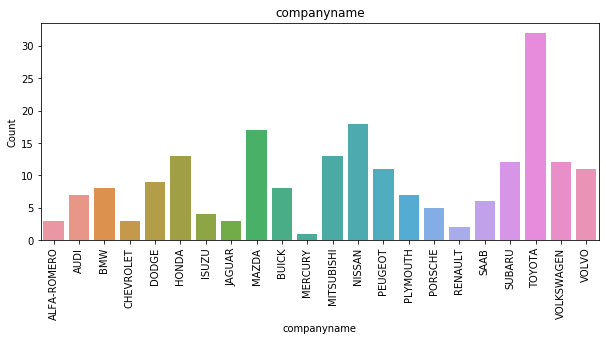

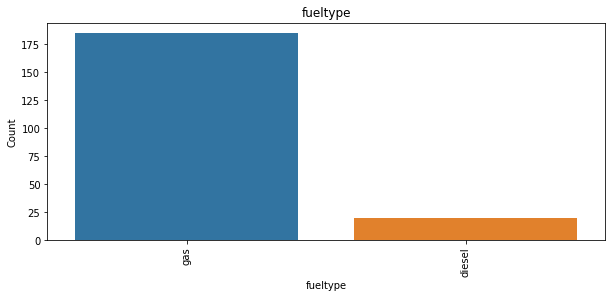

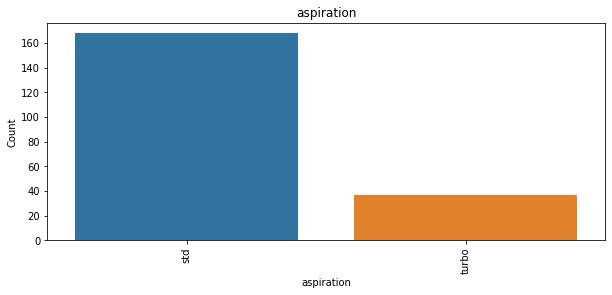

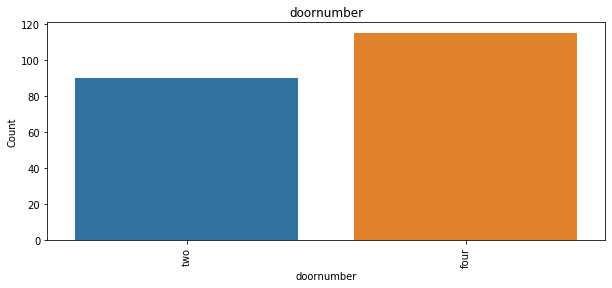

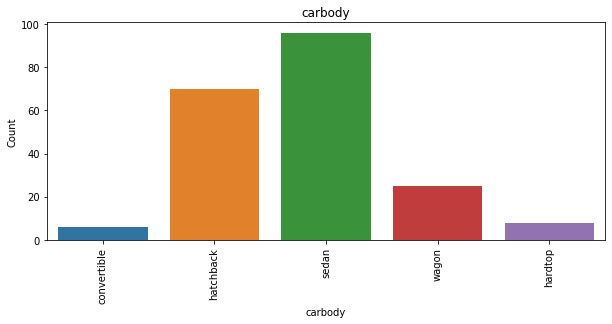

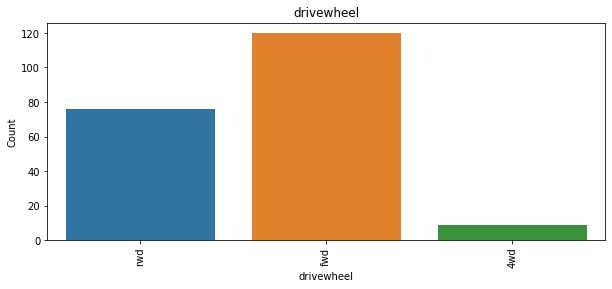

In [13]:
#plotting distribution for Categorical Independent variables 

cat_feature=['fuelsystem', 'cylindernumber','enginetype', 'enginelocation', 'companyname', 'fueltype','aspiration', 'doornumber','carbody','drivewheel']
    
for feature in cat_feature:
    plt.figure(figsize=(10,4))
    sns.countplot(x=feature,data=car_price_df)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.title(feature)
    plt.show()

### Inferences for Categorical variables 
1) Fueltype mpfi, 2bbl were most widely use for car manufacturing 

2) Four cylinder were widly used in car manufacturing

3) enginetype ohc is widley used in car manufacturing

4) majority of card has engine at front side

5) Toyata was wudely used cars

6) gas for widely used for fueltype

7) std was most aspiration

8) Most of the card has 4 doors 

9) Sedan and hatchback cars were widely used

10) fwd was most used drivewheel type 


### Segmented Univarient Analysis 

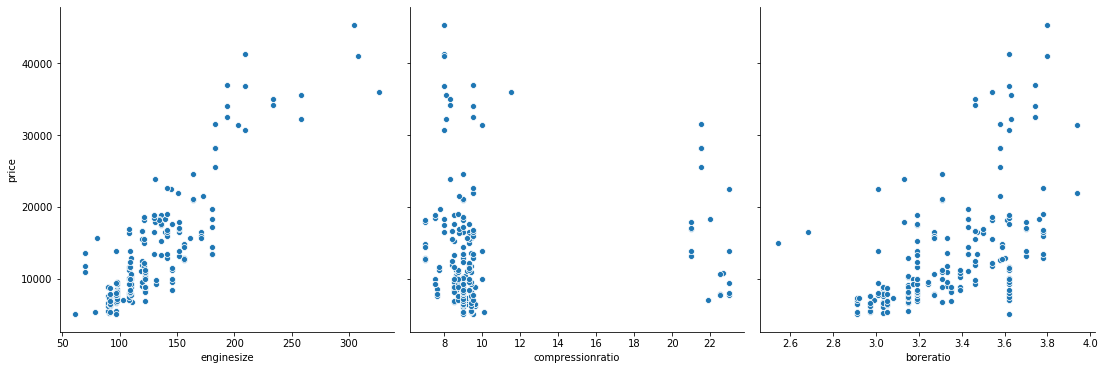

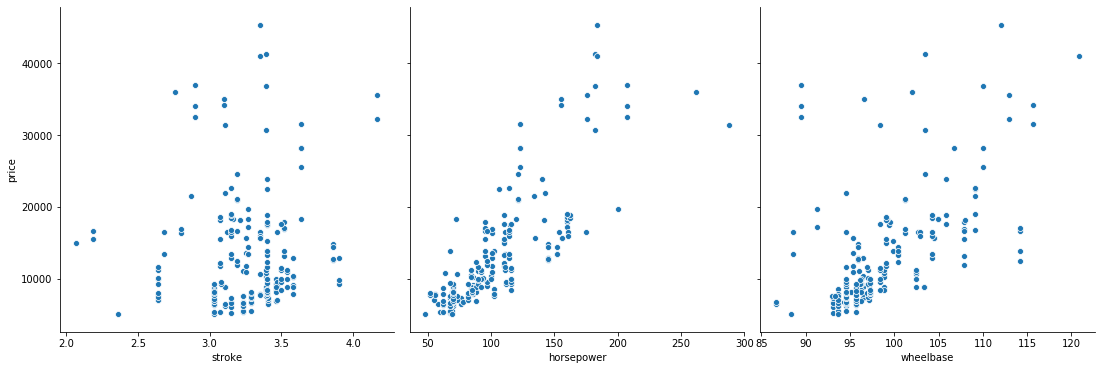

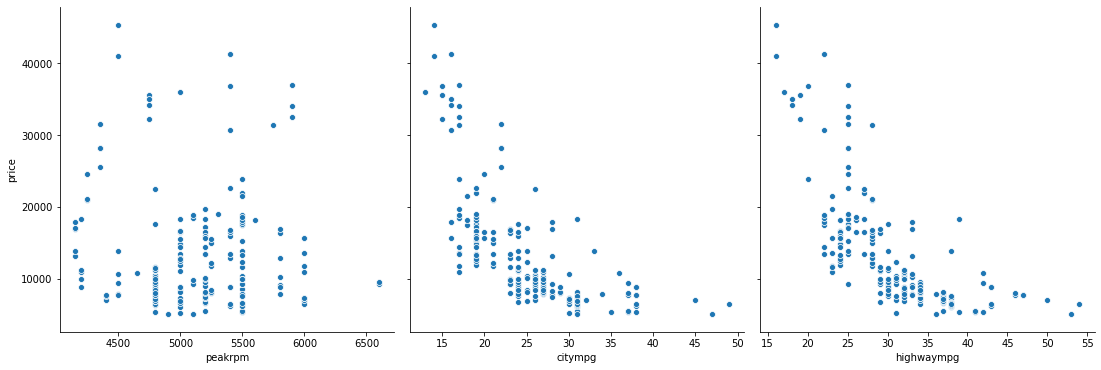

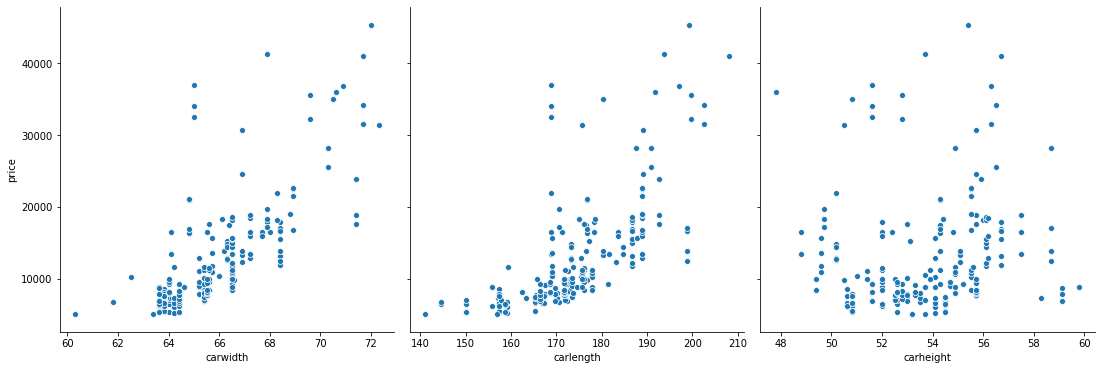

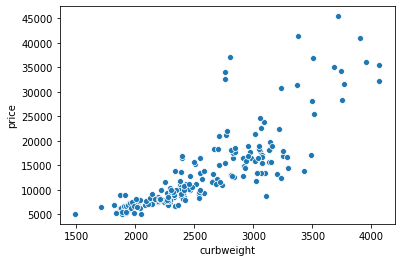

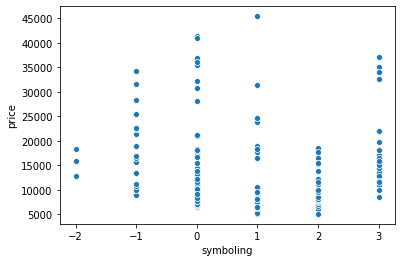

In [14]:
def pairplot(x,y,z):
    sns.pairplot(car_price_df, x_vars=[x,y,z], y_vars='price',size=5, aspect=1, kind='scatter')
    plt.show()
    
pairplot('enginesize','compressionratio','boreratio')
pairplot('stroke','horsepower','wheelbase')
pairplot('peakrpm','citympg','highwaympg')
pairplot('carwidth','carlength','carheight')
sns.scatterplot(x=car_price_df.curbweight, y=car_price_df.price)
plt.show()
sns.scatterplot(x=car_price_df.symboling, y=car_price_df.price)
plt.show()

### Inferences from Numerical variables vs Price:

1) enginesize, boreratio, horsepower, wheelbase has linear relation with price 

2) carwidth, carlength,curbweight has linear relation with price

3) citympg, highmpg has negative linear relation with price

4) compressionration, stroke, peakrpm,carheight, symboling doesnt show any significant trends with price. So as per assumption of Linear Regression we can drop/ignore these for model creation

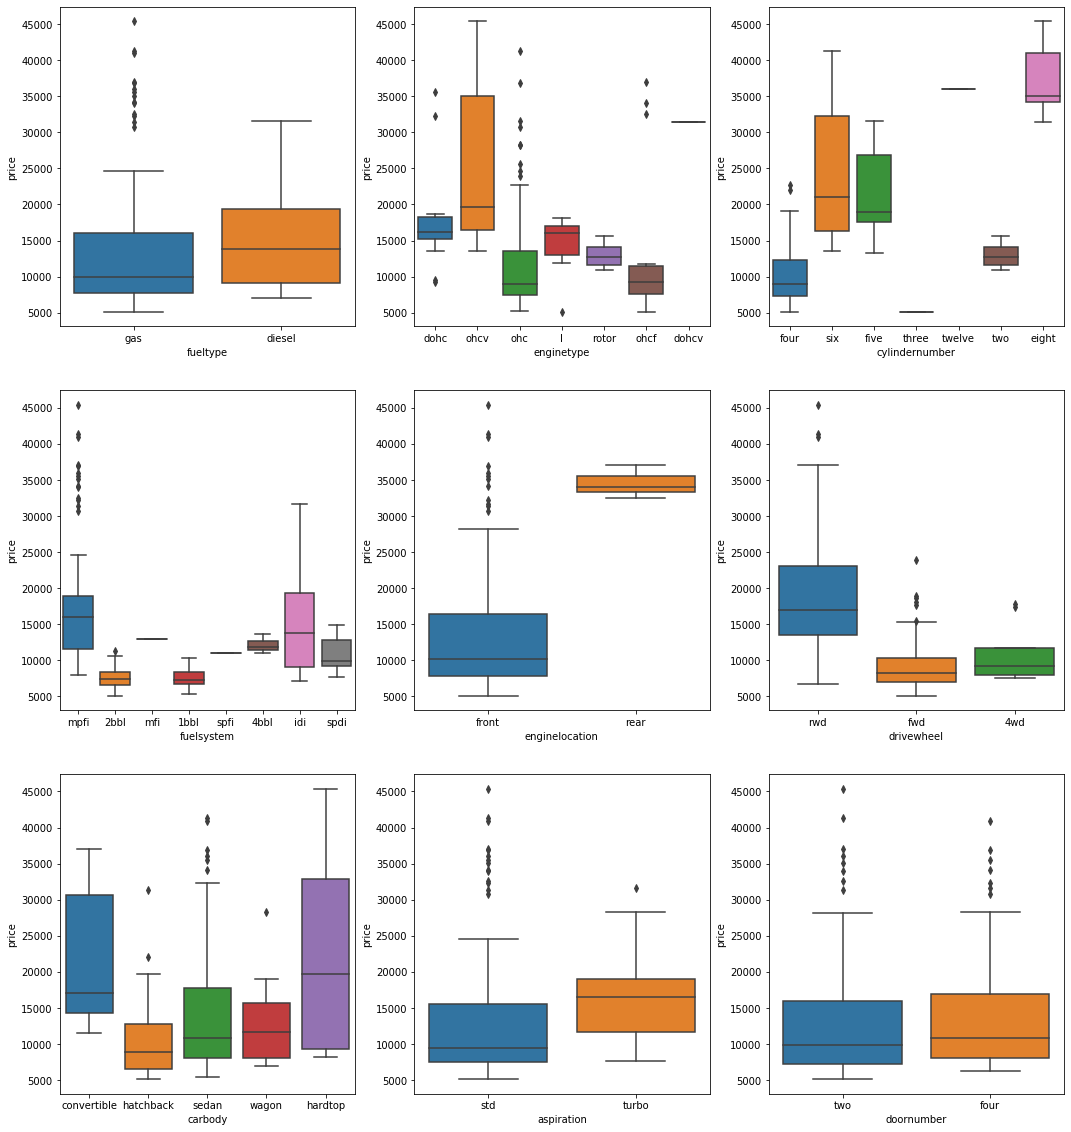

In [15]:
#visuilse categorical variable (box plot)
#fuelsystem, cylindernumber, enginetype, enginelocation, CarName, fueltype,aspiration, doornumber,carbody,drivewheel
plt.figure(figsize=(18,20))
plt.subplot(3,3,1)
sns.boxplot(x='fueltype', y='price', data=car_price_df)
plt.subplot(3,3,2)
sns.boxplot(x='enginetype', y='price', data=car_price_df)
plt.subplot(3,3,3)
sns.boxplot(x='cylindernumber', y='price', data=car_price_df)
plt.subplot(3,3,4)
sns.boxplot(x='fuelsystem', y='price', data=car_price_df)
plt.subplot(3,3,5)
sns.boxplot(x='enginelocation', y='price', data=car_price_df)
plt.subplot(3,3,6)
sns.boxplot(x='drivewheel', y='price', data=car_price_df)
plt.subplot(3,3,7)
sns.boxplot(x='carbody', y='price', data=car_price_df)
plt.subplot(3,3,8)
sns.boxplot(x='aspiration', y='price', data=car_price_df)
plt.subplot(3,3,9)
sns.boxplot(x='doornumber', y='price', data=car_price_df)
plt.show()

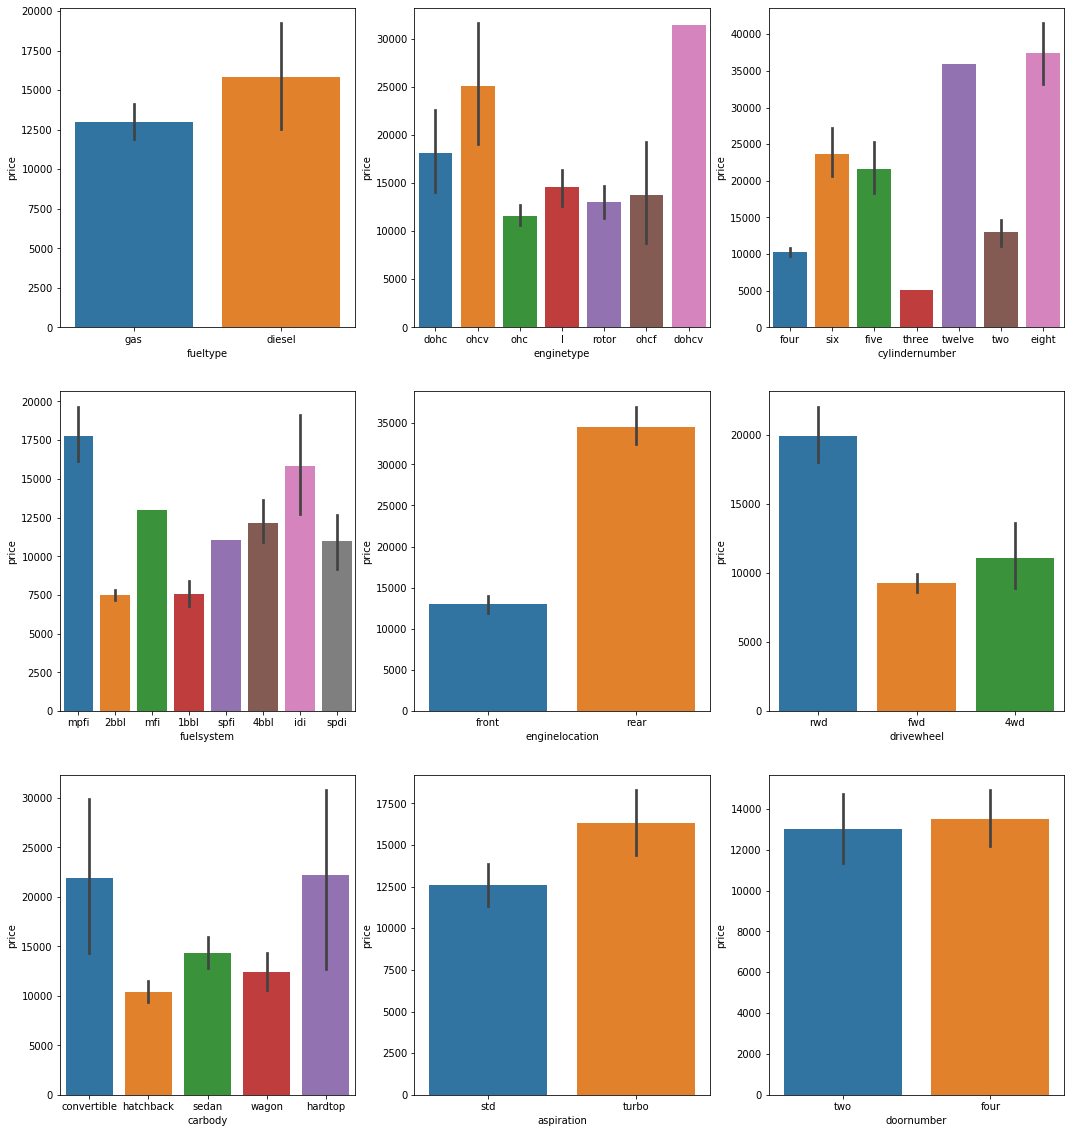

In [16]:
plt.figure(figsize=(18,20))
plt.subplot(3,3,1)
sns.barplot(x='fueltype', y='price', data=car_price_df)
plt.subplot(3,3,2)
sns.barplot(x='enginetype', y='price', data=car_price_df)
plt.subplot(3,3,3)
sns.barplot(x='cylindernumber', y='price', data=car_price_df)
plt.subplot(3,3,4)
sns.barplot(x='fuelsystem', y='price', data=car_price_df)
plt.subplot(3,3,5)
sns.barplot(x='enginelocation', y='price', data=car_price_df)
plt.subplot(3,3,6)
sns.barplot(x='drivewheel', y='price', data=car_price_df)
plt.subplot(3,3,7)
sns.barplot(x='carbody', y='price', data=car_price_df)
plt.subplot(3,3,8)
sns.barplot(x='aspiration', y='price', data=car_price_df)
plt.subplot(3,3,9)
sns.barplot(x='doornumber', y='price', data=car_price_df)
plt.show()

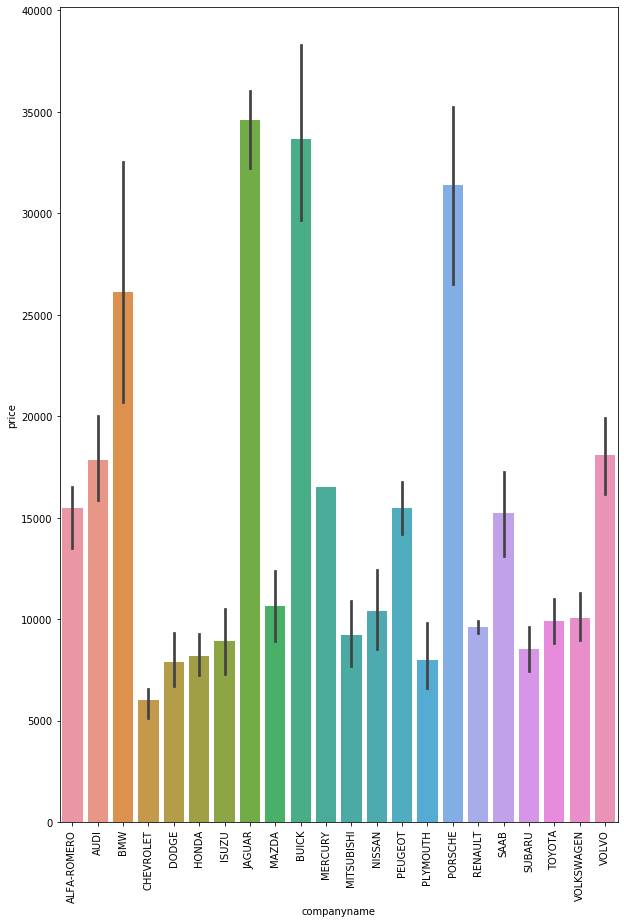

In [17]:
plt.figure(figsize=(10,15))
sns.barplot(x='companyname', y='price', data=car_price_df)
plt.xticks(rotation=90)
plt.show()

### Inferences for categorical variables :

1) Jaguar, Buick, Porsche and BMW are high priced cars 

2) Bodytype Convertibable and hardtop has higher price 

3) cars with mpfi, idi fule system has highest range

4) cylienders <6 in car has high price

5) enginetype dohcv and ohcv has high price 

6) diesel car high in price 

7) drive wheel with rwd has high price 

### Deriving new variables for making analysis easy 

In [18]:
#categorizing the cars based on price for easy analysis and model preparation
# Created 3 categories Economy, Mid and High

car_price_df['price'] = car_price_df['price'].astype(int)

temp_cars_df = car_price_df.copy()

companySegment = temp_cars_df.groupby(['companyname'])['price'].mean()
temp_cars_df = temp_cars_df.merge(companySegment.reset_index(), how='left', on='companyname')

bins=[0,10000,20000,40000]
car_bins=['Economy','Mid','High']

car_price_df['cars_category'] = pd.cut(temp_cars_df['price_y'],bins,right=False,labels=car_bins)
car_price_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,companyname,cars_category
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,13495,ALFA-ROMERO,Mid
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,16500,ALFA-ROMERO,Mid
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000,19,26,16500,ALFA-ROMERO,Mid
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500,24,30,13950,AUDI,Mid
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500,18,22,17450,AUDI,Mid


In [19]:
# As citympg and highwaympg are highly correlated and has negative correlation with price. 
# Derivng a new column for mean of citympg and highwaympg

mpg_mean_df = car_price_df.loc[: , "citympg":"highwaympg"]
car_price_df['avg_mpg'] = mpg_mean_df.mean(axis=1)
car_price_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,companyname,cars_category,avg_mpg
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,2.68,9.0,111,5000,21,27,13495,ALFA-ROMERO,Mid,24.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,2.68,9.0,111,5000,21,27,16500,ALFA-ROMERO,Mid,24.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,3.47,9.0,154,5000,19,26,16500,ALFA-ROMERO,Mid,22.5
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,3.40,10.0,102,5500,24,30,13950,AUDI,Mid,27.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,3.40,8.0,115,5500,18,22,17450,AUDI,Mid,20.0


###  Significant columns as per analysis

car_category, enginetype, fueltype, carbody, aspiration,cylinders, drivewheel, curbweight,carlenght,carwidth, enginesize, boreratio, horsepower, wheelbase and avg_mpg

In [20]:
car_price_df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price', 'companyname', 'cars_category', 'avg_mpg'],
      dtype='object')

In [21]:
#creating a new df for learing model with significant features 

carprice_lm_df = car_price_df[['fueltype', 'aspiration','carbody', 'drivewheel', 'enginetype','cylindernumber', 'fuelsystem',
  'wheelbase','carlength', 'carwidth', 'curbweight',
 'enginesize',  'boreratio', 'horsepower',  'price',
 'cars_category', 'avg_mpg']]

carprice_lm_df

,fueltype,aspiration,carbody,drivewheel,enginetype,cylindernumber,fuelsystem,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,price,cars_category,avg_mpg
0,gas,std,convertible,rwd,dohc,four,mpfi,88.6,168.8,64.1,2548,130,3.47,111,13495,Mid,24.0
1,gas,std,convertible,rwd,dohc,four,mpfi,88.6,168.8,64.1,2548,130,3.47,111,16500,Mid,24.0
2,gas,std,hatchback,rwd,ohcv,six,mpfi,94.5,171.2,65.5,2823,152,2.68,154,16500,Mid,22.5
3,gas,std,sedan,fwd,ohc,four,mpfi,99.8,176.6,66.2,2337,109,3.19,102,13950,Mid,27.0
4,gas,std,sedan,4wd,ohc,five,mpfi,99.4,176.6,66.4,2824,136,3.19,115,17450,Mid,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,gas,std,sedan,rwd,ohc,four,mpfi,109.1,188.8,68.9,2952,141,3.78,114,16845,Mid,25.5
201,gas,turbo,sedan,rwd,ohc,four,mpfi,109.1,188.8,68.8,3049,141,3.78,160,19045,Mid,22.0
202,gas,std,sedan,rwd,ohcv,six,mpfi,109.1,188.8,68.9,3012,173,3.58,134,21485,Mid,20.5
203,diesel,turbo,sedan,rwd,ohc,six,idi,109.1,188.8,68.9,3217,145,3.01,106,22470,Mid,26.5


## Step2 : Preparing data for Modelling 



<Figure size 720x720 with 0 Axes>

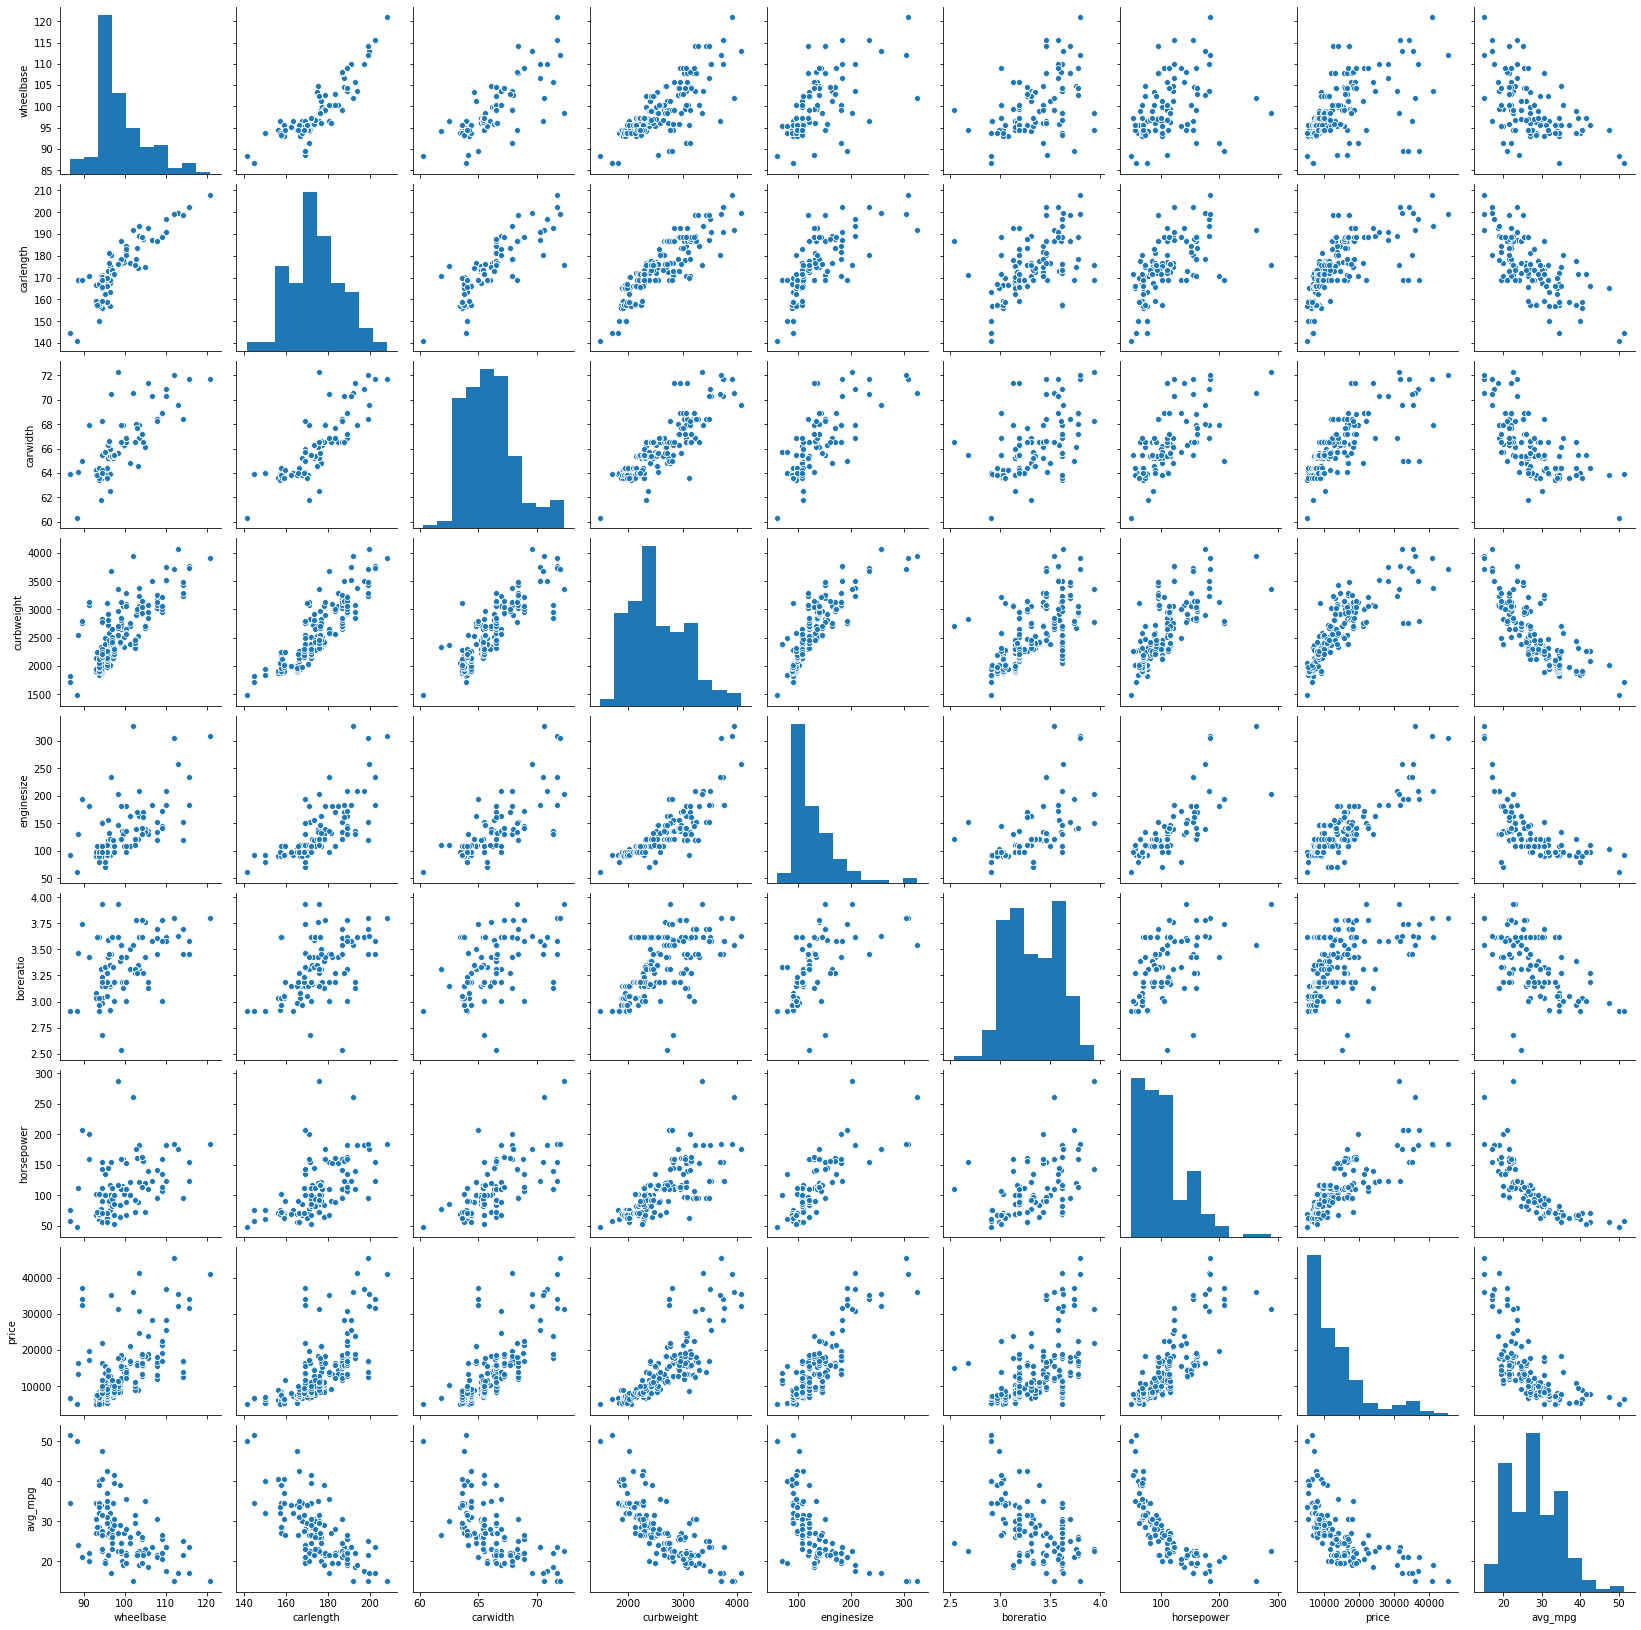

In [22]:
#pair plot for numerical variables
plt.figure(figsize=(10,10))
sns.pairplot(carprice_lm_df)
plt.show()

####  From pairplot we see all the numerical varibles has linear realtionship with target variable  Price

### Creating Dummy variables:

In [23]:
#Converting Categorical varaibles to dummy varaibles 
#creating a function 
def dummies_creation(x,car_df):
    temp = pd.get_dummies(car_df[x], drop_first=True)
    car_df = pd.concat([car_df,temp], axis=1)
    car_df.drop([x], axis=1, inplace=True)
    return car_df



In [24]:
carprice_lm_df = dummies_creation('fueltype',carprice_lm_df)
carprice_lm_df = dummies_creation('aspiration',carprice_lm_df)
carprice_lm_df = dummies_creation('carbody',carprice_lm_df)
carprice_lm_df = dummies_creation('drivewheel',carprice_lm_df)
carprice_lm_df = dummies_creation('enginetype',carprice_lm_df)
carprice_lm_df = dummies_creation('fuelsystem',carprice_lm_df)
carprice_lm_df = dummies_creation('cars_category',carprice_lm_df)
carprice_lm_df = dummies_creation('cylindernumber',carprice_lm_df)

In [25]:
carprice_lm_df

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,price,avg_mpg,gas,...,spdi,spfi,Mid,High,five,four,six,three,twelve,two
0,88.6,168.8,64.1,2548,130,3.47,111,13495,24.0,1,...,0,0,1,0,0,1,0,0,0,0
1,88.6,168.8,64.1,2548,130,3.47,111,16500,24.0,1,...,0,0,1,0,0,1,0,0,0,0
2,94.5,171.2,65.5,2823,152,2.68,154,16500,22.5,1,...,0,0,1,0,0,0,1,0,0,0
3,99.8,176.6,66.2,2337,109,3.19,102,13950,27.0,1,...,0,0,1,0,0,1,0,0,0,0
4,99.4,176.6,66.4,2824,136,3.19,115,17450,20.0,1,...,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,109.1,188.8,68.9,2952,141,3.78,114,16845,25.5,1,...,0,0,1,0,0,1,0,0,0,0
201,109.1,188.8,68.8,3049,141,3.78,160,19045,22.0,1,...,0,0,1,0,0,1,0,0,0,0
202,109.1,188.8,68.9,3012,173,3.58,134,21485,20.5,1,...,0,0,1,0,0,0,1,0,0,0
203,109.1,188.8,68.9,3217,145,3.01,106,22470,26.5,0,...,0,0,1,0,0,0,1,0,0,0


In [26]:
carprice_lm_df.dtypes


wheelbase     float64
carlength     float64
carwidth      float64
curbweight      int64
enginesize      int64
boreratio     float64
horsepower      int64
price           int32
avg_mpg       float64
gas             uint8
turbo           uint8
hardtop         uint8
hatchback       uint8
sedan           uint8
wagon           uint8
fwd             uint8
rwd             uint8
dohcv           uint8
l               uint8
ohc             uint8
ohcf            uint8
ohcv            uint8
rotor           uint8
2bbl            uint8
4bbl            uint8
idi             uint8
mfi             uint8
mpfi            uint8
spdi            uint8
spfi            uint8
Mid             uint8
High            uint8
five            uint8
four            uint8
six             uint8
three           uint8
twelve          uint8
two             uint8
dtype: object

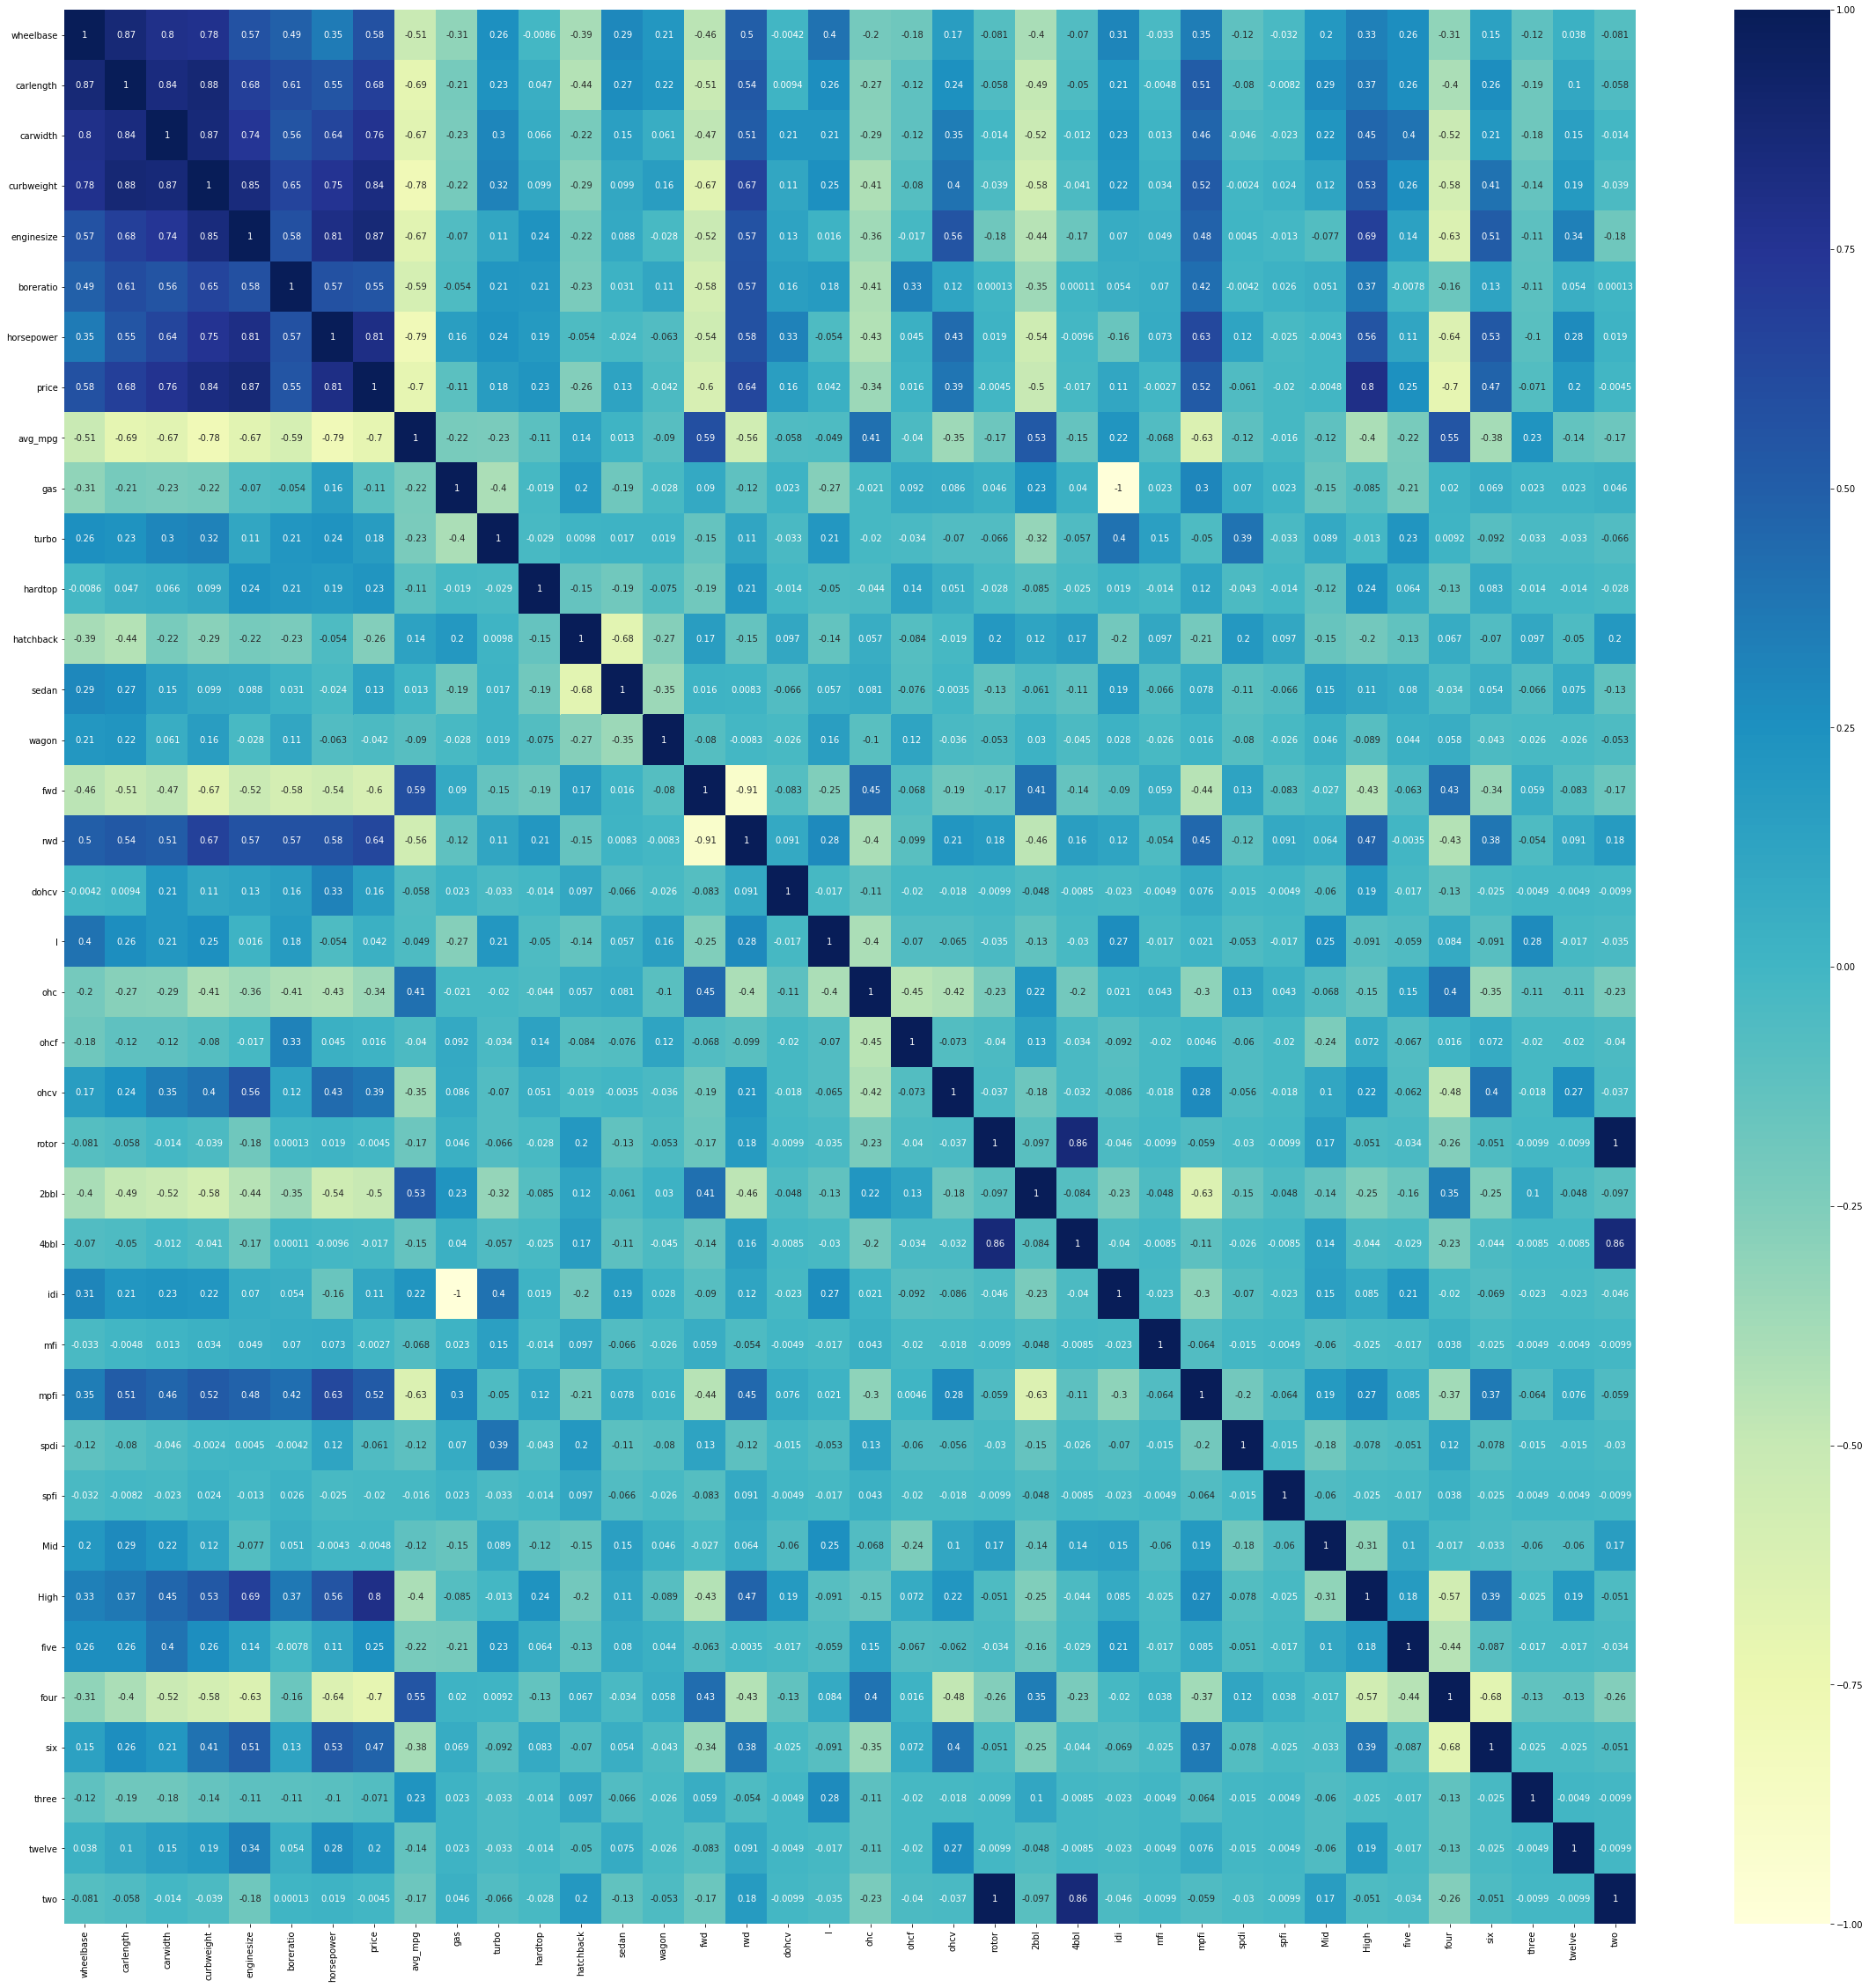

In [27]:
plt.figure(figsize=(40,40))
sns.heatmap(carprice_lm_df.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [28]:
carprice_lm_df.shape

(205, 38)

### Split  data as train set and test set

In [29]:
np.random.seed(0)
car_df_train_set, car_df_test_set = train_test_split(carprice_lm_df, train_size=0.7, test_size=0.3, random_state=100)

In [30]:
car_df_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143 entries, 122 to 8
Data columns (total 38 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   wheelbase   143 non-null    float64
 1   carlength   143 non-null    float64
 2   carwidth    143 non-null    float64
 3   curbweight  143 non-null    int64  
 4   enginesize  143 non-null    int64  
 5   boreratio   143 non-null    float64
 6   horsepower  143 non-null    int64  
 7   price       143 non-null    int32  
 8   avg_mpg     143 non-null    float64
 9   gas         143 non-null    uint8  
 10  turbo       143 non-null    uint8  
 11  hardtop     143 non-null    uint8  
 12  hatchback   143 non-null    uint8  
 13  sedan       143 non-null    uint8  
 14  wagon       143 non-null    uint8  
 15  fwd         143 non-null    uint8  
 16  rwd         143 non-null    uint8  
 17  dohcv       143 non-null    uint8  
 18  l           143 non-null    uint8  
 19  ohc         143 non-null    u

In [31]:
car_df_test_set

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,price,avg_mpg,gas,...,spdi,spfi,Mid,High,five,four,six,three,twelve,two
160,95.7,166.3,64.4,2094,98,3.19,70,7738,42.5,1,...,0,0,0,0,0,1,0,0,0,0
186,97.3,171.7,65.5,2275,109,3.19,85,8495,30.5,1,...,0,0,1,0,0,1,0,0,0,0
59,98.8,177.8,66.5,2385,122,3.39,84,8845,29.0,1,...,0,0,1,0,0,1,0,0,0,0
165,94.5,168.7,64.0,2265,98,3.24,112,9298,27.5,1,...,0,0,0,0,0,1,0,0,0,0
140,93.3,157.3,63.8,2240,108,3.62,73,7603,28.5,1,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28,103.3,174.6,64.6,2535,122,3.34,88,8921,27.0,1,...,0,0,0,0,0,1,0,0,0,0
29,95.9,173.2,66.3,2811,156,3.60,145,12964,21.5,1,...,0,0,0,0,0,1,0,0,0,0
182,97.3,171.7,65.5,2261,97,3.01,52,7775,41.5,0,...,0,0,1,0,0,1,0,0,0,0
40,96.5,175.4,62.5,2372,110,3.15,86,10295,30.0,1,...,0,0,0,0,0,1,0,0,0,0


### Rescaling the numerical features 

Using Min-Max scaler


In [32]:
#1. Instantiate an object
scaler = MinMaxScaler()

#create a list of numeric vars
num_vars=['wheelbase','carlength','carwidth','curbweight','enginesize','boreratio','horsepower','price','avg_mpg']

#2. Fit on data
car_df_train_set[num_vars] = scaler.fit_transform(car_df_train_set[num_vars])

car_df_train_set.head()

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,price,avg_mpg,gas,...,spdi,spfi,Mid,High,five,four,six,three,twelve,two
122,0.244828,0.426016,0.291667,0.272692,0.139623,0.230159,0.083333,0.068818,0.534247,1,...,0,0,0,0,0,1,0,0,0,0
125,0.272414,0.452033,0.666667,0.500388,0.339623,1.000000,0.395833,0.466890,0.219178,1,...,0,0,0,1,0,1,0,0,0,0
166,0.272414,0.448780,0.308333,0.314973,0.139623,0.444444,0.266667,0.122110,0.342466,1,...,0,0,0,0,0,1,0,0,0,0
1,0.068966,0.450407,0.316667,0.411171,0.260377,0.626984,0.262500,0.314446,0.246575,1,...,0,0,1,0,0,1,0,0,0,0
199,0.610345,0.775610,0.575000,0.647401,0.260377,0.746032,0.475000,0.382131,0.123288,1,...,0,0,1,0,0,1,0,0,0,0


### Step 3: Training of Model

###  Reusable Functions for Builing a model and checking VIF after each model creation

In [33]:
#Model building

def build_model(X,y):
    X = sm.add_constant(X) #In statsmodels we need to adding a constant
    lm = sm.OLS(y,X).fit() # create a fitting model
    print(lm.summary()) # prining model summary
    return X


In [34]:
#Funtion for checking VIF values of the features in the model 
    
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

#### Dividing into X and Y sets for model building

In [35]:
y_train = car_df_train_set.pop('price')
X_train = car_df_train_set

## Building Linear model

This time, we will be using the **LinearRegression function from SciKit Learn** for its compatibility with RFE (which is a utility from sklearn)

### RFE (Recursive Feature Elimination)

In [36]:
#creating LinearRegression object 
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [37]:
#running RFE with the output number of the variables equal to 13
rfe = RFE(lm,13) 
rfe = rfe.fit(X_train, y_train)

In [38]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143 entries, 122 to 8
Data columns (total 37 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   wheelbase   143 non-null    float64
 1   carlength   143 non-null    float64
 2   carwidth    143 non-null    float64
 3   curbweight  143 non-null    float64
 4   enginesize  143 non-null    float64
 5   boreratio   143 non-null    float64
 6   horsepower  143 non-null    float64
 7   avg_mpg     143 non-null    float64
 8   gas         143 non-null    uint8  
 9   turbo       143 non-null    uint8  
 10  hardtop     143 non-null    uint8  
 11  hatchback   143 non-null    uint8  
 12  sedan       143 non-null    uint8  
 13  wagon       143 non-null    uint8  
 14  fwd         143 non-null    uint8  
 15  rwd         143 non-null    uint8  
 16  dohcv       143 non-null    uint8  
 17  l           143 non-null    uint8  
 18  ohc         143 non-null    uint8  
 19  ohcf        143 non-null    u

In [39]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('wheelbase', True, 1),
 ('carlength', False, 8),
 ('carwidth', True, 1),
 ('curbweight', True, 1),
 ('enginesize', False, 12),
 ('boreratio', False, 7),
 ('horsepower', True, 1),
 ('avg_mpg', True, 1),
 ('gas', False, 17),
 ('turbo', False, 23),
 ('hardtop', True, 1),
 ('hatchback', True, 1),
 ('sedan', True, 1),
 ('wagon', True, 1),
 ('fwd', False, 15),
 ('rwd', False, 13),
 ('dohcv', True, 1),
 ('l', False, 21),
 ('ohc', False, 4),
 ('ohcf', False, 5),
 ('ohcv', False, 6),
 ('rotor', False, 20),
 ('2bbl', False, 22),
 ('4bbl', False, 19),
 ('idi', False, 14),
 ('mfi', False, 24),
 ('mpfi', False, 16),
 ('spdi', False, 10),
 ('spfi', False, 25),
 ('Mid', False, 9),
 ('High', True, 1),
 ('five', False, 3),
 ('four', True, 1),
 ('six', False, 2),
 ('three', False, 11),
 ('twelve', True, 1),
 ('two', False, 18)]

In [40]:
col = X_train.columns[rfe.support_]
col

Index(['wheelbase', 'carwidth', 'curbweight', 'horsepower', 'avg_mpg',
       'hardtop', 'hatchback', 'sedan', 'wagon', 'dohcv', 'High', 'four',
       'twelve'],
      dtype='object')

In [41]:
X_train.columns[~rfe.support_]

Index(['carlength', 'enginesize', 'boreratio', 'gas', 'turbo', 'fwd', 'rwd',
       'l', 'ohc', 'ohcf', 'ohcv', 'rotor', '2bbl', '4bbl', 'idi', 'mfi',
       'mpfi', 'spdi', 'spfi', 'Mid', 'five', 'six', 'three', 'two'],
      dtype='object')

In [42]:
X_train_rfe = X_train[X_train.columns[rfe.support_]]

X_train_rfe_copy = X_train_rfe

X_train_rfe.head()


,wheelbase,carwidth,curbweight,horsepower,avg_mpg,hardtop,hatchback,sedan,wagon,dohcv,High,four,twelve
122,0.244828,0.291667,0.272692,0.083333,0.534247,0,0,1,0,0,0,1,0
125,0.272414,0.666667,0.500388,0.395833,0.219178,0,1,0,0,0,1,1,0
166,0.272414,0.308333,0.314973,0.266667,0.342466,0,1,0,0,0,0,1,0
1,0.068966,0.316667,0.411171,0.262500,0.246575,0,0,0,0,0,0,1,0
199,0.610345,0.575000,0.647401,0.475000,0.123288,0,0,0,1,0,0,1,0


### Model 1:

In [43]:
X_train_new = build_model(X_train_rfe,y_train)
checkVIF(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     142.9
Date:                Mon, 10 Aug 2020   Prob (F-statistic):           7.14e-70
Time:                        01:11:16   Log-Likelihood:                 212.47
No. Observations:                 143   AIC:                            -396.9
Df Residuals:                     129   BIC:                            -355.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0018      0.050      0.036      0.9

,Features,VIF
0,const,106.50
8,sedan,13.40
3,curbweight,12.55
7,hatchback,11.59
4,horsepower,8.45
1,wheelbase,6.75
9,wagon,6.44
2,carwidth,6.32
5,avg_mpg,3.88
12,four,2.10


#### Inference: R2 and Adjusted R2 are close. From P value and VIF we observe wheelbase has high values so dropping them and builing a new model

### Model 2:

In [44]:
X_train_new = X_train_new.drop(["wheelbase"], axis = 1)
X_train_new = build_model(X_train_new,y_train)
checkVIF(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     154.2
Date:                Mon, 10 Aug 2020   Prob (F-statistic):           1.15e-70
Time:                        01:11:16   Log-Likelihood:                 211.67
No. Observations:                 143   AIC:                            -397.3
Df Residuals:                     130   BIC:                            -358.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0134      0.048     -0.278      0.7

,Features,VIF
0,const,99.67
7,sedan,10.11
6,hatchback,9.49
2,curbweight,8.50
3,horsepower,6.79
1,carwidth,5.21
8,wagon,5.20
4,avg_mpg,3.85
11,four,2.10
5,hardtop,1.82


#### Inference: R2 and Adjusted R2 are close. From P value of hardtop and twelve  has high values but low VIF values. Comparing both variables considering hardtop as key element for price so dropping twelve and builing a new model

### Model 3:

In [45]:
X_train_new = X_train_new.drop(["twelve"], axis = 1)
X_train_new = build_model(X_train_new,y_train)
checkVIF(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     166.7
Date:                Mon, 10 Aug 2020   Prob (F-statistic):           2.32e-71
Time:                        01:11:16   Log-Likelihood:                 210.58
No. Observations:                 143   AIC:                            -397.2
Df Residuals:                     131   BIC:                            -361.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0033      0.047      0.070      0.9

,Features,VIF
0,const,93.66
7,sedan,10.09
6,hatchback,9.49
2,curbweight,8.44
3,horsepower,5.63
1,carwidth,5.21
8,wagon,5.18
4,avg_mpg,3.68
11,four,2.05
5,hardtop,1.80


#### Inference: R2 and Adjusted R2 are close. P value of hardtop has high values but low VIF value. So, dropping hardtop and builing a new model

### Model 4:

In [46]:
X_train_new = X_train_new.drop(["hardtop"], axis = 1)
X_train_new = build_model(X_train_new,y_train)
checkVIF(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     183.3
Date:                Mon, 10 Aug 2020   Prob (F-statistic):           2.74e-72
Time:                        01:11:16   Log-Likelihood:                 210.04
No. Observations:                 143   AIC:                            -398.1
Df Residuals:                     132   BIC:                            -365.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0124      0.044     -0.280      0.7

,Features,VIF
0,const,83.19
2,curbweight,8.34
6,sedan,6.18
5,hatchback,5.76
3,horsepower,5.43
1,carwidth,5.20
4,avg_mpg,3.60
7,wagon,3.58
10,four,2.05
9,High,1.78


#### Inference: R2 and Adjusted R2 are close. P value of avg_mpg has high values but low VIF value. So, dropping avg_mpg and builing a new model

### Model 5:

In [47]:

X_train_new = X_train_new.drop(["avg_mpg"], axis = 1)
X_train_new = build_model(X_train_new,y_train)
checkVIF(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     200.3
Date:                Mon, 10 Aug 2020   Prob (F-statistic):           8.26e-73
Time:                        01:11:16   Log-Likelihood:                 208.42
No. Observations:                 143   AIC:                            -396.8
Df Residuals:                     133   BIC:                            -367.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0387      0.033      1.164      0.2

,Features,VIF
0,const,46.32
2,curbweight,8.12
5,sedan,6.12
4,hatchback,5.72
1,carwidth,5.14
3,horsepower,4.10
6,wagon,3.58
9,four,2.04
8,High,1.73
7,dohcv,1.50


#### Inference: R2 and Adjusted R2 are close. P value of dohcv has high values but low VIF value. So, dropping dohcv and builing a new model

### Model 6:

In [48]:
X_train_new = X_train_new.drop(["dohcv"], axis = 1)
X_train_new = build_model(X_train_new,y_train)
checkVIF(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     218.3
Date:                Mon, 10 Aug 2020   Prob (F-statistic):           6.07e-73
Time:                        01:11:16   Log-Likelihood:                 205.81
No. Observations:                 143   AIC:                            -393.6
Df Residuals:                     134   BIC:                            -367.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0547      0.033      1.661      0.0

,Features,VIF
0,const,44.16
2,curbweight,6.84
5,sedan,6.11
4,hatchback,5.69
1,carwidth,4.68
6,wagon,3.52
3,horsepower,3.25
8,four,1.98
7,High,1.68


#### Inference: R2 and Adjusted R2 are close. P value of all variables are low but we have VIF values high. Curbweight,sedan and hatchback has high VIF. sedan and Hatchback are carbody type varibles which are highly correlated So, dropping sedan and builing a new model

### Model 7:

In [49]:
X_train_new = X_train_new.drop(["sedan"], axis = 1)
X_train_new = build_model(X_train_new,y_train)
checkVIF(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     231.5
Date:                Mon, 10 Aug 2020   Prob (F-statistic):           6.15e-72
Time:                        01:11:16   Log-Likelihood:                 200.38
No. Observations:                 143   AIC:                            -384.8
Df Residuals:                     135   BIC:                            -361.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0149      0.026     -0.574      0.5

,Features,VIF
0,const,25.54
2,curbweight,6.81
1,carwidth,4.46
3,horsepower,3.15
7,four,1.97
6,High,1.68
4,hatchback,1.28
5,wagon,1.23


#### Inference: R2 and Adjusted R2 are close. P value are not signoficant for carwidth, hatchback, wagon variables but we have VIF values high for curbweight. curbweight and carwidth varibles are highly correlated So, dropping carwidth and builing a new model

### Model 8:

In [50]:
X_train_new = X_train_new.drop(["curbweight"], axis = 1)
X_train_new = build_model(X_train_new,y_train)
checkVIF(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     224.8
Date:                Mon, 10 Aug 2020   Prob (F-statistic):           5.05e-68
Time:                        01:11:16   Log-Likelihood:                 187.87
No. Observations:                 143   AIC:                            -361.7
Df Residuals:                     136   BIC:                            -341.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0030      0.028     -0.107      0.9

,Features,VIF
0,const,25.33
2,horsepower,2.62
1,carwidth,2.12
6,four,1.95
5,High,1.64
3,hatchback,1.21
4,wagon,1.11


#### Inference : Wagon has high P value, so dropping and rebuiling  model

### Model 9:

In [51]:
X_train_new = X_train_new.drop(["wagon"], axis = 1)
X_train_new = build_model(X_train_new,y_train)
checkVIF(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     269.6
Date:                Mon, 10 Aug 2020   Prob (F-statistic):           4.79e-69
Time:                        01:11:16   Log-Likelihood:                 187.35
No. Observations:                 143   AIC:                            -362.7
Df Residuals:                     137   BIC:                            -344.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0056      0.028     -0.200      0.8

,Features,VIF
0,const,25.12
2,horsepower,2.62
1,carwidth,2.12
5,four,1.94
4,High,1.62
3,hatchback,1.11


#### Inference:
1) P values for all fields are significant >0.005

2) VIF values are >5

3) R2 and Adjusted R2 are close to .90

4) Prob(F-Stat) has high value

5) Model seems to be stable

### Step 4: Residual Analysis of Model

In [52]:
lm = sm.OLS(y_train,X_train_new).fit()
y_train_price = lm.predict(X_train_new)

Text(0.5, 0, 'Errors')

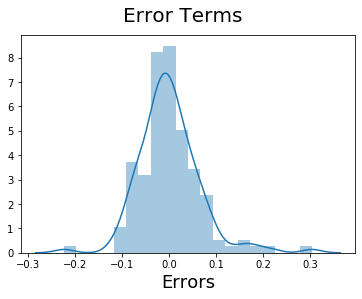

In [53]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)   

#### Inference : Error terms seems to be normal distributed centered zero, so assumptions on linear modelling seems to be fulfilled

### Step 5: Prediction and Evalution

In [54]:
#Scaling the test set
num_vars=['wheelbase','carlength','carwidth','curbweight','enginesize','boreratio','horsepower','price','avg_mpg']

car_df_test_set[num_vars] = scaler.fit_transform(car_df_test_set[num_vars])

In [55]:
#Dividing into X and y
y_test = car_df_test_set.pop('price')
X_test = car_df_test_set

In [56]:
# Now let's use our model to make predictions.
X_train_new = X_train_new.drop('const',axis=1)
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

In [57]:
# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [58]:
# Making predictions
y_pred = lm.predict(X_test_new)

### Evalution of test using y_pred and y_test

In [59]:
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred)

0.8912879917709029

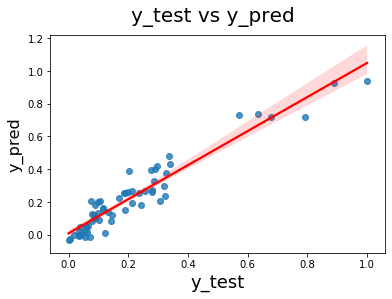

In [60]:
#EVALUATION OF THE MODEL
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
sns.regplot(x=y_test,y=y_pred,line_kws={"color": "red"})
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)  
plt.show()

###  Conclusion


1) P values for all fields are less than significant >0.005 level, all the predictors are statistically significant

2) VIF values are >5 means less multicolinearity

3) R2 and Adjusted R2 are close to .90 --> 90% variance explained not by chance

4) Prob(F-Stat) has high value, model fit is significant and explained 90% variance

5) Test set R2 is 89% whcih is close to train set variance

###  Following are the fields significant in price deciding  factor

1) Horse power

2) Car body ( Hatchback)

3) Cylinder ( Four)

4) Car width

5) Car Company ( High range cars) 

###  Change in these any of the independent variable mentioned above will significantly effect the target variable price of the car